In [1]:
import pandas as pd

df = pd.read_csv('dataset_Olympics.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Prise de connaissance

Visiblement il s'agit de données des athlètes ayant participé aux JO. Essayons d'en extraire des informations intéressantes et de mieux connaître le type de chaque variable.

In [2]:
df.shape

(70000, 15)

In [3]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


#### Les quartiles

##### 1er quartile: 
    25% des athlètes ont une un âge inférieur ou égal à 21 ans, une taille supérieure ou égale à 1,68 mètres,
    ont un poids supérieur ou égal à 61 Kg,
    
##### 2ème quartile, Médiane
    50% des athlètes ont 25 ans d'âge, 1,75 mètres de taille, pèsent environs 70 Kg, 

##### 3ème quartile
    75% des athlètes ont 28 ans, 1,83 de taille et environs 79 Kg de poids,
    
    
##### Valeures maximales
    De 1896 à 2016, l'âge le plus élevé enregistré est de 88 ans, la taille la plus élevée enregistrée est 2,23 mètres et le poids records est 214 Kg. 
    
##### Valeurs minimales
    De 1896 à 2016, l'athlète le plus jeune a 11 ans, la plus petite taille enregistrée es 1,27 mètres et le plus petit poids enregistré est 25 Kg. 
    
##### En moyenne...
    Les athlètes ont plus de 25 ans, font plus d' 1,75 mètres et pèsent un peu plus de 70 Kg

In [6]:
# Les statistiques des variables qualitatives 
df.describe(include = ['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


##### Count : Toutes les variables de type object ont 70 000 observations non nulles. 
##### Unique : Les valeurs uniques, Nous avons 35 556 valeurs uniques dans la variable Name. Il y a donc 35 556 athtlètes dans la base de données
##### TOP: 'Oksana Aleksandrovna Chusovitina' est l'athlète ayant le plus de participations aux jeux jusqu'en 2016
##### Freq: 'Oksana Aleksandrovna Chusovitina' qui est la modalité la plus fréquente totalise 29 participations, les USA ont  eu 5216 apparitions...

In [7]:
df['Medal'].value_counts()

Medal
Gold      3292
Bronze    3208
Silver    3190
Name: count, dtype: int64

##### On remarque que la médaille d'or a été remportée 3292 fois, le bronze 3208 fois, l'argent 3190 fois

On peut faire une analyse des données des médailles d'or remportées

Essayons de connaître le nombre de médailles d'or par Sexe.

In [8]:
#dfGold.value_counts(dfGold['Sex']== 'F') ou

df[df['Medal']=='Gold']['Sex'].value_counts()

Sex
M    2386
F     906
Name: count, dtype: int64

In [9]:
df[df['Medal']=='Gold']['City'].value_counts()

City
London                    333
Los Angeles               213
Athina                    205
Rio de Janeiro            174
Sydney                    155
Beijing                   146
Paris                     143
Barcelona                 138
Atlanta                   134
Seoul                     129
Antwerpen                 120
Moskva                    103
Montreal                  101
Tokyo                      90
Munich                     87
Stockholm                  85
Roma                       84
Melbourne                  83
Mexico City                77
Berlin                     74
Helsinki                   72
Amsterdam                  65
St. Louis                  47
Torino                     45
Salt Lake City             44
Sochi                      43
Nagano                     35
Lillehammer                33
Vancouver                  31
Innsbruck                  29
Lake Placid                24
Albertville                21
Sankt Moritz               17
Garmi

On remarque que le plus grand nombre de médailles d'or a été remporté à Londres. Est-ce que cette analyse est intuitive? Essayons de savoir combien de JO ont été organisés à Londres Jusqu'en 2016

In [10]:
df[df['City']=='London']['Year'].value_counts()

Year
2012    3377
1948    1792
1908     865
Name: count, dtype: int64

On se rend compte que London a abrité les JO en 1908, en 1948 et en 2012. On remarque également entre ces trois dates une croissance des occurences.
Ce qui laisse comprendre que les JO on connus une croissance importante d'athlètes participants. Une croissance de plus de 390%. 

On peut donc conclure qu'un tel nombre de médailles d'or à Londres est raisonnable, sous réserve que d'autres données plus complètes le contredisent.

##### Essayons à présent de savoir s'il y a un lien entre l'âge des athlètes et leurs performances 

In [11]:
df[df['Medal']=='Gold']['Age'].value_counts()

Age
23.0    279
24.0    268
22.0    264
25.0    262
21.0    240
26.0    236
27.0    204
29.0    181
28.0    180
20.0    170
30.0    134
19.0    107
31.0    106
32.0     88
33.0     77
18.0     67
34.0     58
17.0     48
35.0     47
36.0     32
37.0     24
15.0     23
38.0     23
16.0     21
40.0     19
44.0     13
39.0     12
42.0     10
41.0      9
14.0      9
43.0      9
49.0      7
47.0      5
46.0      5
45.0      4
52.0      4
48.0      3
50.0      3
56.0      2
54.0      2
13.0      2
57.0      1
53.0      1
59.0      1
Name: count, dtype: int64

##### Visiblement, les athlètes de la vinghtaine ont le plus remporté de médailles d'or, mais cela démontre-t-il vraiment une meilleure performance de leur part? 
Si on écarte les sports de groupe et le fait que les athlètes aux JO sont en grand nombre jeunes, cette analyse sera certainement plus plosible.

Recherchons donc le moyen d'arriver à un meilleur niveau de précision.

In [12]:
df.groupby(['Name'])['Medal'].describe(include=['object'])

,count,unique,top,freq
Name,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",0,0,NaN,NaN
Luis ngel Fernando de los Santos Grossi,0,0,NaN,NaN
Th Anh,0,0,NaN,NaN
Th Ngn Thng,0,0,NaN,NaN
Tin Tun,0,0,NaN,NaN
...,...,...,...,...
zcan Ediz,0,0,NaN,NaN
zdemir Akbal,0,0,NaN,NaN
zden Ezinler,0,0,NaN,NaN


##### Nous allons créer une base de donnée dfGold qui regroupe les athlètes qui ont remporté la médaille d'or jusqu'en 2016 à partie de df pour affiner notre analyse des performances des athlètes jeunes de la vinghtaine

In [13]:
dfGold = df[df['Medal']=='Gold']
dfGold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69878,35595,"William Mead Lindsley ""Billy"" Fiske, III",M,16.0,NaN,NaN,United States-2,USA,1928 Winter,1928,Winter,Sankt Moritz,Bobsleigh,Bobsleigh Men's Four/Five,Gold
69879,35595,"William Mead Lindsley ""Billy"" Fiske, III",M,20.0,NaN,NaN,United States-1,USA,1932 Winter,1932,Winter,Lake Placid,Bobsleigh,Bobsleigh Men's Four,Gold
69974,35644,Benita P. Fitzgerald-Brown (-Mosley),F,23.0,178.0,65.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 100 metres Hurdles,Gold
69977,35647,"James Paul ""Jim"" Fitzpatrick",M,27.0,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Rugby,Rugby Men's Rugby,Gold


#### Obtenons plus de précisions sur ces données. Affichons les statistiques descriptives des données quantitatives dont l'Age

In [14]:
dfGold.describe()

,ID,Age,Height,Weight,Year
count,3292.000000,3260.000000,2528.000000,2456.000000,3292.000000
mean,18370.134569,25.925460,177.786392,73.731678,1971.698056
std,10152.654311,5.806084,11.109176,15.371896,34.864742
min,4.000000,13.000000,136.000000,30.000000,1896.000000
25%,10053.250000,22.000000,170.000000,63.000000,1948.000000
50%,18025.500000,25.000000,178.000000,73.000000,1980.000000
75%,27295.000000,29.000000,185.000000,83.000000,2000.000000
max,35653.000000,59.000000,216.000000,170.000000,2016.000000


### Commentaires sur la variable d'intérêt 'Age'

#### Moyenne et médiane
L'âge moyen des athlètes les plus performants est 25 ans révolu. La moitié des médaillés d'or a 25 ans
#### 1er et 3ème Quartiles
Parmis les athlètes les plsu performants, 25% ont 22 ans ou moins et 75% ont 29 ans ou moins.

##### On en déduit que 75 % des athlètes les plus performants sont effectivement dans leur vinghtaine

### Visualisation 

<Figure size 500x500 with 0 Axes>

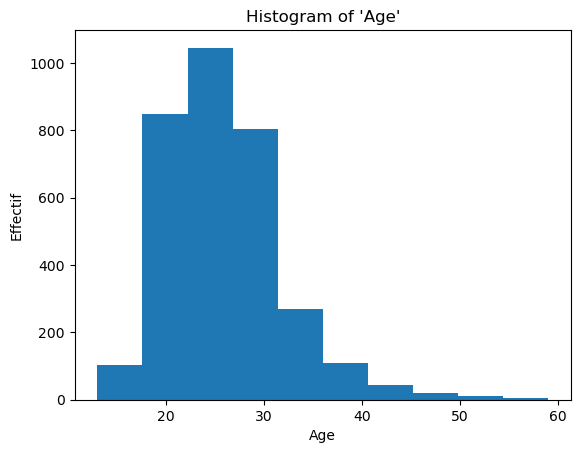

<Figure size 500x500 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

plt.hist(dfGold['Age'])
plt.title("Histogram of 'Age'")
plt.xlabel("Age")
plt.ylabel("Effectif")
plt.figure(figsize=(5,5))


#### Diagramme en barres

In [23]:
#Déterminons les effectifs par âge, Cette fois nous indexons chaque modalité en fonction de sa valeur

effectif = dfGold['Age'].value_counts().reset_index()
type(effectif)
print(effectif)

     Age  count
0   23.0    279
1   24.0    268
2   22.0    264
3   25.0    262
4   21.0    240
5   26.0    236
6   27.0    204
7   29.0    181
8   28.0    180
9   20.0    170
10  30.0    134
11  19.0    107
12  31.0    106
13  32.0     88
14  33.0     77
15  18.0     67
16  34.0     58
17  17.0     48
18  35.0     47
19  36.0     32
20  37.0     24
21  15.0     23
22  38.0     23
23  16.0     21
24  40.0     19
25  44.0     13
26  39.0     12
27  42.0     10
28  41.0      9
29  14.0      9
30  43.0      9
31  49.0      7
32  47.0      5
33  46.0      5
34  45.0      4
35  52.0      4
36  48.0      3
37  50.0      3
38  56.0      2
39  54.0      2
40  13.0      2
41  57.0      1
42  53.0      1
43  59.0      1


<BarContainer object of 44 artists>

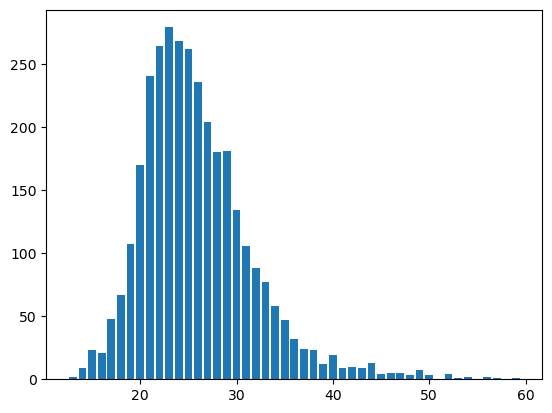

In [31]:
plt.bar(effectif['Age'],effectif['count'])

#### Pie Chart

([<matplotlib.patches.Wedge at 0x1d4926b2a50>,
 [Text(1.0987703246840352, 0.051997822971159735, '279'),
  Text(1.0886273410356144, 0.15776727274605587, '268'),
  Text(1.068863333861803, 0.25986760768866907, '264'),
  Text(1.038804090671584, 0.36178178672230504, '262'),
  Text(0.9999964688130658, 0.4582652750988222, '240'),
  Text(0.9511166216301292, 0.5526094208922699, '236'),
  Text(0.8853772139447307, 0.652768863402251, '204'),
  Text(0.8045233502189207, 0.7501614352607869, '181'),
  Text(0.7112924240428566, 0.8390846724253979, '180'),
  Text(0.6251575410974642, 0.9050845534031461, '170'),
  Text(0.5289774891952624, 0.9644598570830598, '134'),
  Text(0.42929529980240855, 1.0127712207441326, '107'),
  Text(0.3230984793980415, 1.0514786600833483, '106'),
  Text(0.18457535893153737, 1.084403954656794, '88'),
  Text(0.038439672272274836, 1.0993281546451907, '77'),
  Text(-0.07683239227282407, 1.0973134390399286, '67'),
  Text(-0.1934872294892436, 1.0828493394856815, '58'),
  Text(-0.3057

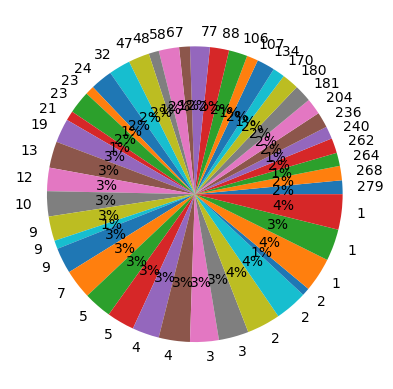

In [37]:
plt.pie(effectif['Age'], labels=effectif['count'], autopct="%1.f%%")

<Axes: xlabel='Age', ylabel='Density'>

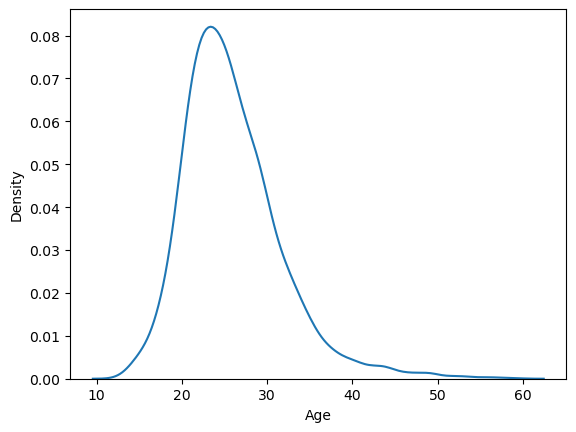

In [20]:
import seaborn as sns
sns.kdeplot(dfGold["Age"])

#### Affichons les statistiques descriptives des variables de type objet afin d'en dégager le mode au niveau de la Variable "Name".
Ceci nous permettra ensuite d'en juger sur la performance du plus médaillé en fonction de son âge.

In [32]:
dfGold.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292
unique,2568,2,176,84,51,2,42,63,537,1
top,"Raymond Clarence ""Ray"" Ewry",M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,10,2386,709,747,174,2858,333,365,113,3292


In [33]:
dfGold[dfGold['Name']=='Raymond Clarence "Ray" Ewry']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
65574,33557,"Raymond Clarence ""Ray"" Ewry",M,26.0,185.0,79.0,United States,USA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's Standing High Jump,Gold
65575,33557,"Raymond Clarence ""Ray"" Ewry",M,26.0,185.0,79.0,United States,USA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's Standing Long Jump,Gold
65576,33557,"Raymond Clarence ""Ray"" Ewry",M,26.0,185.0,79.0,United States,USA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's Standing Triple Jump,Gold
65577,33557,"Raymond Clarence ""Ray"" Ewry",M,30.0,185.0,79.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Athletics,Athletics Men's Standing High Jump,Gold
65578,33557,"Raymond Clarence ""Ray"" Ewry",M,30.0,185.0,79.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Athletics,Athletics Men's Standing Long Jump,Gold
65579,33557,"Raymond Clarence ""Ray"" Ewry",M,30.0,185.0,79.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Athletics,Athletics Men's Standing Triple Jump,Gold
65580,33557,"Raymond Clarence ""Ray"" Ewry",M,32.0,185.0,79.0,United States,USA,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's Standing High Jump,Gold
65581,33557,"Raymond Clarence ""Ray"" Ewry",M,32.0,185.0,79.0,United States,USA,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's Standing Long Jump,Gold
65582,33557,"Raymond Clarence ""Ray"" Ewry",M,34.0,185.0,79.0,United States,USA,1908 Summer,1908,Summer,London,Athletics,Athletics Men's Standing High Jump,Gold
65583,33557,"Raymond Clarence ""Ray"" Ewry",M,34.0,185.0,79.0,United States,USA,1908 Summer,1908,Summer,London,Athletics,Athletics Men's Standing Long Jump,Gold


##### On se rend compte que le plus médaillé a obtenu sa première médaille d'or olympique à 26 ans. 
Sur 10 médailles d'or, il en a obtenu 3 dans sa vinghtaine et ce la même année, à la même édition des JO de Paris 1900.
Il pratique des sports individuels que sont le saut en hauteur, le saut en longueur et le triple saut.

In [34]:
dfGold.value_counts(dfGold['Sex']== 'F')

Sex
False    2386
True      906
Name: count, dtype: int64

<Figure size 400x300 with 0 Axes>

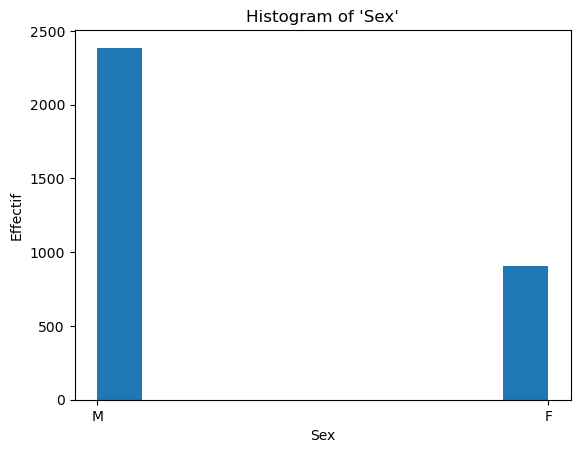

<Figure size 400x300 with 0 Axes>

In [35]:
plt.hist(dfGold['Sex'])
plt.title("Histogram of 'Sex'")
plt.xlabel("Sex")
plt.ylabel("Effectif")
plt.figure(figsize=(4,3))